In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [6]:
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true, tf.squeeze(y_pred))


def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true, tf.squeeze(y_pred))


In [17]:
# Import the dataset

insurance = pd.read_csv(
    "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


# Normilize the data

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
    # one hot encodes given columns
)

# create X & y vals 

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the column transformer to the training data
ct.fit(X_train)

# transform the training data and test data with normalization 
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


X_train.shape, X_train_normal.shape



((1070, 6), (1070, 11))

In [36]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, name="input"),
    tf.keras.layers.Dense(100, name="hidden1", activation="relu"),
    tf.keras.layers.Dense(100, name="hidden2", activation="relu"),
    tf.keras.layers.Dense(1, name="output")
], name="insurances_model")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

history = model.fit(X_train_normal, y_train, epochs=2000, verbose=0)


9/9 [==============================] - 0s 2ms/step - loss: 1260.9183 - mae: 1260.9183


<AxesSubplot:>

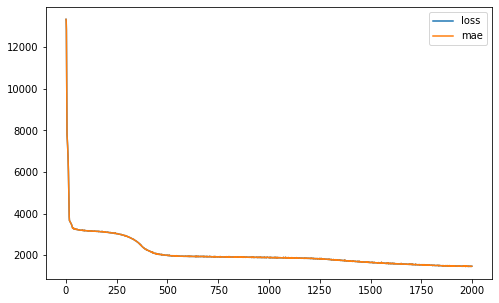

In [37]:
y_pred = model.predict(X_test_normal)
model.evaluate(X_test_normal, y_test), y_train.mean()
pd.DataFrame(history.history).plot(figsize=(8, 5)) # making a loss curve

